In [11]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import time


In [12]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="ansi")

In [13]:
env.reset()
print(env.render()) 


SFFF
FHFH
FFFH
HFFG



In [14]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))


In [15]:
num_episodes = 2000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001


In [16]:
rewards_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()[0]
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        exploration_threshold = random.uniform(0, 1)
        
        # Choose action based on exploration vs exploitation
        if exploration_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, truncated, info = env.step(action)
        
        # Update Q-value
        q_table[state, action] = q_table[state, action] + learning_rate * \
            (reward + discount_rate * np.max(q_table[new_state, :]) - q_table[state, action])
        
        state = new_state
        rewards_current_episode += reward
        
        if done:
            break
    
    # Decay exploration rate
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * \
                       np.exp(-exploration_decay_rate * episode)
    
    rewards_all_episodes.append(rewards_current_episode)


C:\Users\arunv\AppData\Roaming\Python\Python312\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [17]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 1000)

print("Average reward per 1000 episodes:")
for count, r in enumerate(rewards_per_thousand_episodes):
    print(f"{(count+1) * 1000}: {np.mean(r)}")


Average reward per 1000 episodes:
1000: 0.226
2000: 0.701


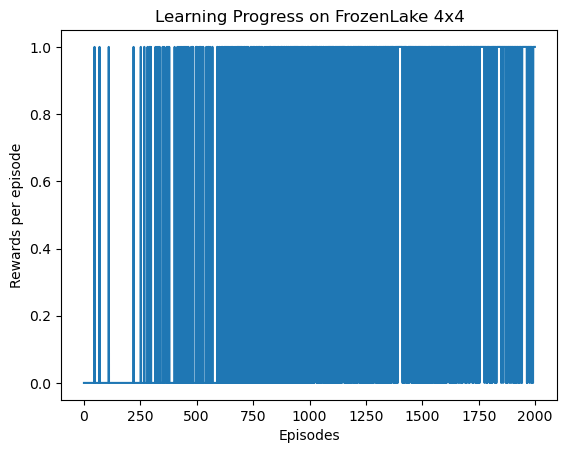

In [19]:
plt.plot(rewards_all_episodes)
plt.xlabel('Episodes')
plt.ylabel('Rewards per episode')
plt.title('Learning Progress on FrozenLake 4x4')
plt.show()


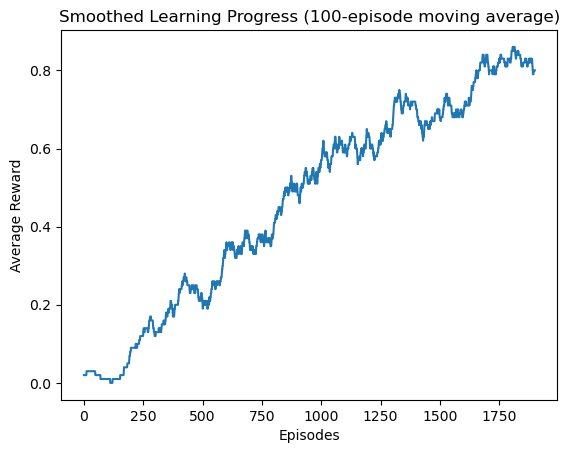

In [21]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

moving_avg_rewards = moving_average(rewards_all_episodes, 100)
plt.plot(moving_avg_rewards)
plt.title("Smoothed Learning Progress (100-episode moving average)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.show()



In [20]:
import time

for episode in range(5):
    state = env.reset()[0]
    done = False
    print(f"EPISODE {episode + 1}\n\n")
    time_steps = 0
    
    for step in range(max_steps_per_episode):
        env.render()  # Show the environment in the console
        time.sleep(0.5)
        
        action = np.argmax(q_table[state, :])  # Use learned best action
        new_state, reward, done, truncated, info = env.step(action)
        state = new_state
        time_steps += 1
        
        if done:
            if reward == 1:
                print(f"🎉 Reached the goal in {time_steps} steps!\n")
            else:
                print("❌ Fell into a hole.\n")
            break

env.close()


EPISODE 1


🎉 Reached the goal in 6 steps!

EPISODE 2


🎉 Reached the goal in 6 steps!

EPISODE 3


🎉 Reached the goal in 6 steps!

EPISODE 4


🎉 Reached the goal in 6 steps!

EPISODE 5


🎉 Reached the goal in 6 steps!

